<h2 id="toc">목차</h2>

1. [시각화를 통한 데이터 확인](#contents1)
2. [요약](#contents2)
3. [분석](#contents3)
4. [상관계수](#contents4)
5. [히트맵](#contents5)
6. [통계적 유의성 검정](#contents6)
7. [배점별 정답률 통계량](#contents7)

<h3 id="contents1">1. 시각화를 통한 데이터 확인</h3>

[⬆ 목차로](#toc)

---

배점의 빈도가 어떻게 나타나는지 확인하기 위해 시각화 해봅시다

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import pandas as pd

In [2]:

df = pd.read_csv('수학시험_데이터_preprocessed.csv', encoding='utf-8-sig')

막대 그래프

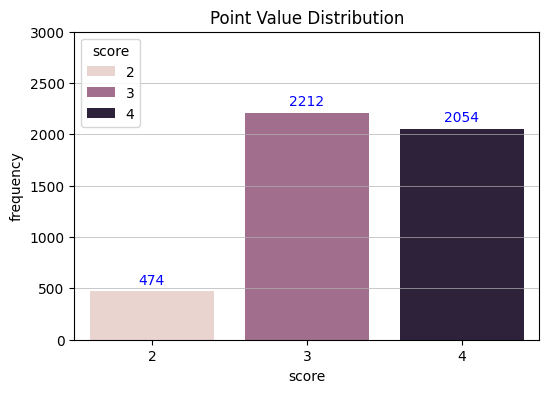

In [15]:
# x축은 배점, y축은 배점의 빈도
score_counts = df.score.value_counts().sort_index()

# DataFrame 형태로 변환
plot_df = score_counts.reset_index()
plot_df.columns = ['score', 'frequency']

# 시각화
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=plot_df, x='score', y='frequency', hue = 'score')

# y축 범위 및 눈금 설정
plt.ylim(0, 3000)

# 막대 위에 숫자 표시
for container in ax.containers:
    ax.bar_label(container, 
                 fmt='%d', 
                 label_type='edge', 
                 padding=3,
                 fontsize = 10,
                 color = 'blue')

# 그래프 꾸미기
plt.title('Point Value Distribution', fontsize=12)
plt.xlabel('score', fontsize=10)
plt.ylabel('frequency', fontsize=10)
plt.xticks([0, 1, 2], labels=[2, 3, 4])  # x축 위치에 값 재설정
plt.grid(axis = 'y', linestyle='-', alpha=0.7, linewidth=0.7)
plt.show()

원형 차트

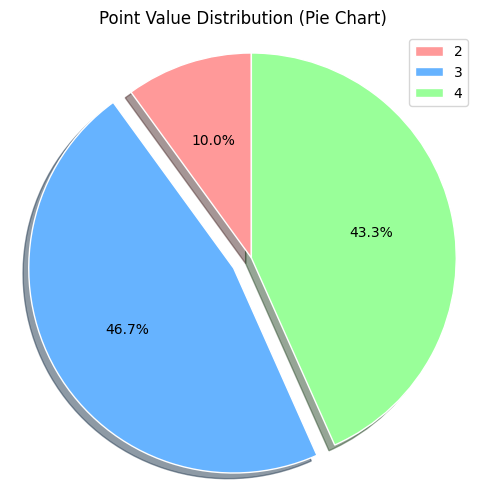

In [16]:
# 라벨, 값 추출
labels = score_counts.index
sizes = score_counts.values

# 가장 작은 값 찾기
max_index = sizes.argmax()
# min_index = sizes.argmin()

# explode 리스트 생성: 가장 작은 조각만 0.1만큼 분리
explode = [0.1 if i == max_index else 0 for i in range(len(sizes))]

# 색상 설정 (선택사항)
colors = ['#ff9999', '#66b3ff', '#99ff99']

# 파이 차트 시각화
plt.figure(figsize=(6, 6))
patches, *_ = plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    wedgeprops={'edgecolor': 'white'},
    shadow=True
)
plt.legend(patches, labels, loc='best')

plt.title('Point Value Distribution (Pie Chart)')
plt.axis('equal')  # 원형 유지
plt.show()

히스토그램

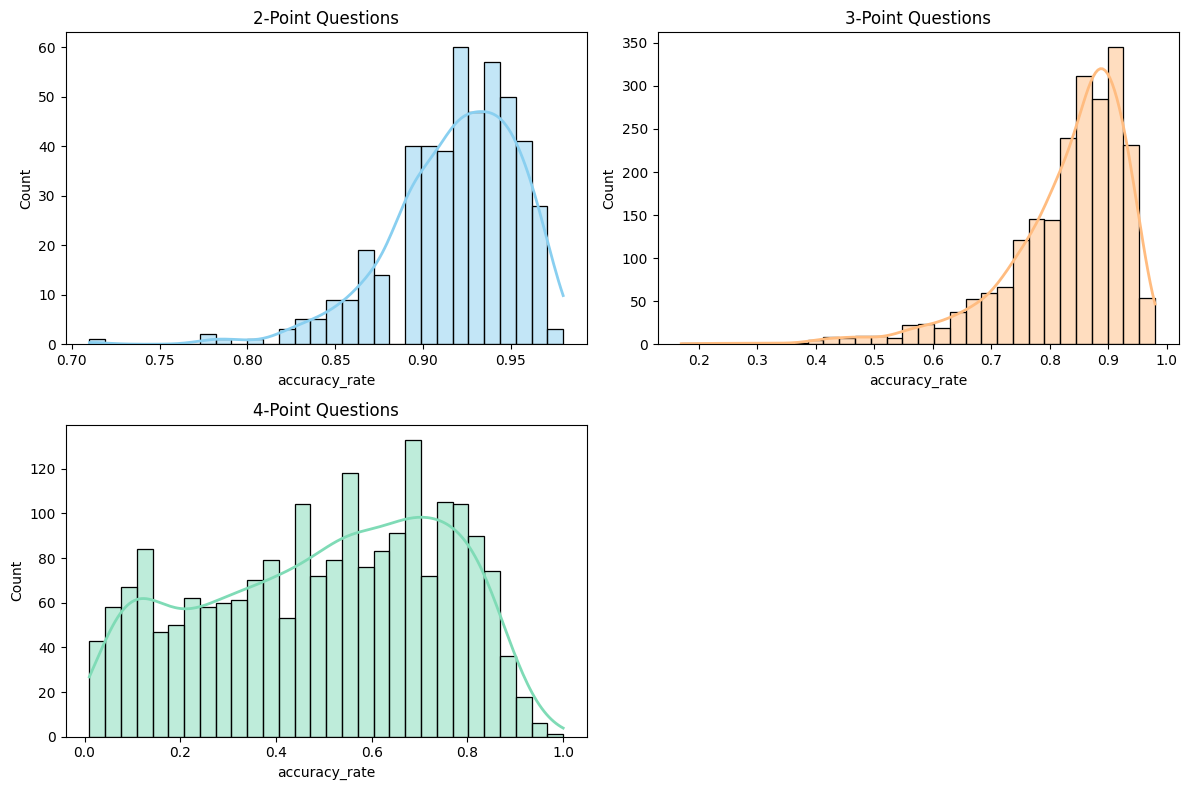

In [17]:
scores = df['score'].unique()

plt.figure(figsize=(12, 8))

# 1번 그래프: 파스텔톤
plt.subplot(2, 2, 1)
sns.histplot(
    df[df['score'] == scores[0]]['accuracy_rate'],
    kde=True,
    bins=30,
    color='#89CFF0',  # 막대 색
    line_kws={'color': '#1F4E79', 'linewidth': 2}  # KDE 선 색
)
plt.title(f"{scores[0]}-Point Questions")

# 2번 그래프: 따뜻한 톤
plt.subplot(2, 2, 2)
sns.histplot(
    df[df['score'] == scores[1]]['accuracy_rate'],
    kde=True,
    bins=30,
    color='#FFBC80',
    line_kws={'color': '#D46A30', 'linewidth': 2}
)
plt.title(f"{scores[1]}-Point Questions")

# 3번 그래프: 모던 블루그린
plt.subplot(2, 2, 3)
sns.histplot(
    df[df['score'] == scores[2]]['accuracy_rate'],
    kde=True,
    bins=30,
    color='#7FDBB6',
    line_kws={'color': '#0B5345', 'linewidth': 2}
)
plt.title(f"{scores[2]}-Point Questions")

plt.tight_layout()
plt.show()


상자그림

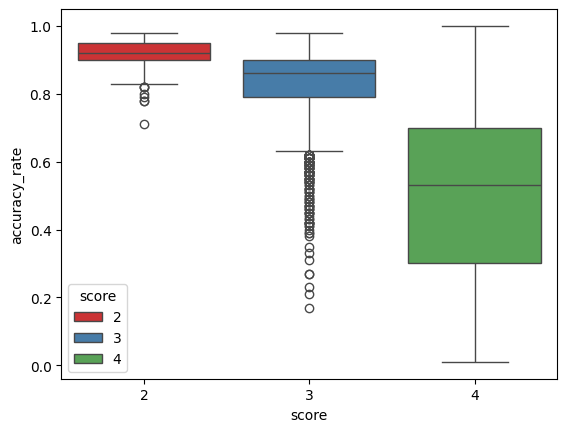

In [18]:
sns.boxplot(x='score', y='accuracy_rate', data=df, hue = 'score', palette='Set1')
plt.show()

<h3 id="contents2">2. 요약</h3>

[⬆ 목차로](#toc)

---

2점짜리 문제가 확실히 숫자가 적습니다 (10%)

3점짜리 문제수와 4점짜리 문제수가 비슷하고 3점짜리가 조금 더 많습니다

3 > 4 > 2

4점짜리 문제는 정답률이 고르게 분포되어 있습니다 (표준편차가 클것으로 추정)

데이터를 확인하기 위해 간단한 시각화를 진행해봤습니다

<h3 id="contents3">3. 분석</h3>

[⬆ 목차로](#toc)

---

'배점이 높은 문제일수록 정답률이 낮을것이다' 라는 가설이 맞는지 보려고 합니다

그럼 '배점'과 '정답률'이 어떤 상관관계를 갖는지 알아봅시다

우선, 산점도와 회귀선을 그려보겠습니다

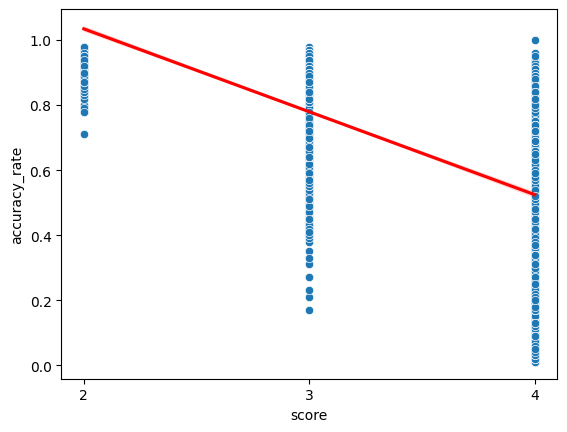

In [19]:
sns.scatterplot(x='score', y='accuracy_rate', data=df)
sns.regplot(x='score', y='accuracy_rate', data=df, scatter=False, color='red')
plt.xticks([2, 3, 4])
plt.show()

<h3 id="contents4">4. 상관계수</h3>

[⬆ 목차로](#toc)

---

In [20]:
corr_pearson = df['score'].corr(df['accuracy_rate'], method='pearson')
corr_spearman = df['score'].corr(df['accuracy_rate'], method='spearman')

print(f"피어슨 상관계수: {corr_pearson:.4f}")
print(f"스피어만 상관계수: {corr_spearman:.4f}")

피어슨 상관계수: -0.6643
스피어만 상관계수: -0.7479


#### 상관계수 선택 및 해석

일반적으로 연속형 숫자는 피어슨, 스피어만 상관계수 모두 적합하고

이산형 변수는 스피어만 상관계수에 적합하다고 합니다

**'배점'은 이산형 변수(2, 3, 4)이므로 스피어만 상관계수를 선택하면 -0.755**가 됩니다

'배점'과 '정답률'이 꽤 강한 음의 상관관계를 보인다고 해석할 수 있습니다 (배점이 높을수록 정답률이 낮아짐)

<h3 id="contents5">5. 히트맵</h3>

[⬆ 목차로](#toc)

---

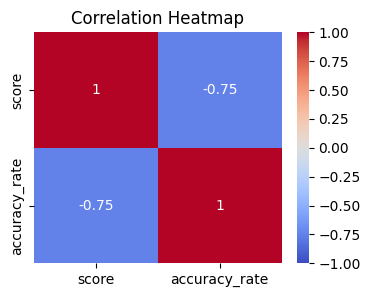

In [21]:
# 'score', 'accuracy_rate' 두 컬럼만 뽑기
corr = df[['score', 'accuracy_rate']].corr(method='spearman', numeric_only=True)

# 히트맵 그리기
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

<h3 id="contents6">6. 통계적 유의성 검정</h3>

[⬆ 목차로](#toc)

---

In [22]:
corr, p_value = spearmanr(df['score'], df['accuracy_rate'])
print(f"스피어만 상관계수: {corr:.4f}, p-value: {p_value:.4e}")

스피어만 상관계수: -0.7479, p-value: 0.0000e+00


- p-value가 0.05보다 작고, 0.0에 수렴하는 매우 작은 값으로 나타났습니다.  
  따라서 통계적으로 **매우 유의미**하다고 볼 수 있습니다.

- 즉, **'배점(score)'과 '정답률(accuracy_rate)' 사이에는  
  강한 음의 상관관계가 존재함**을 확인할 수 있습니다.

<h3 id="contents7">7. 배점별 정답률 통계량</h3>

[⬆ 목차로](#toc)

---

In [23]:
grouped = df.groupby('score')['accuracy_rate'].describe().T
grouped

score,2,3,4
count,474.000000,2212.000000,2054.000000
mean,0.918671,0.829155,0.497785
std,0.036711,0.106989,0.247244
min,0.710000,0.170000,0.010000
25%,0.900000,0.790000,0.300000
50%,0.920000,0.860000,0.530000
75%,0.950000,0.900000,0.700000
max,0.980000,0.980000,1.000000


예상대로 **배점이 높을수록 정답률의 표준편차가 크게** 나타났습니다.

  이는 곧, 고배점 문항에서는 학생들의 정답률이 **평균으로부터 더 크게 흩어져** 있다는 의미입니다.

반면, 저배점 문항은 표준편차가 상대적으로 작아, 대부분의 학생들이

  비슷한 수준의 정답률을 보인다고 해석할 수 있습니다.